In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Artificial Neural Network**

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
  return np.tanh(x)

def grad_tanh(x):
  return 1 - tanh(x)**2

In [17]:
class ArtificialNeuralNetwork():
    #initialisation
    def __init__(self,input_nodes, hidden_nodes, output_nodes, operation = 'XOR'):
      self.W1 = np.random.randn(input_nodes, hidden_nodes)
      self.W2 = np.random.randn(hidden_nodes, output_nodes)
      self.operation = operation

    #forwardpropagaton
    def forwardpass(self, X):
      self.input = X
      self.Z = sigmoid(self.input @ self.W1)
      self.Y_pred = self.Z @ self.W2
      if(self.operation == 'XOR'):
        self.Y_pred = tanh(self.Y_pred)
      return self.Y_pred

    #Loss function
    def loss_mse(self, Y, Y_pred):
      return np.mean((Y - Y_pred)**2)

    #Backpropogation
    def backpropogate(self, Y, y_pred):
      error_output = Y - y_pred
      if(self.operation == 'XOR'):
        self.grad_l_W2 = -2*self.Z.T @ (error_output * grad_tanh(y_pred)) / len(Y)
        res0 = grad_tanh(y_pred)
        res1 = error_output*res0
        res2 = res1 @ self.W2.T
        res3 = res2 * grad_sigmoid(self.Z)
        self.grad_l_W1 = -2*self.input.T @ res3 / len(Y)
        return [self.grad_l_W1, self.grad_l_W2]

      self.grad_l_W2 = -2*self.Z.T @ (error_output) / len(Y)
      #res0 = grad_relu(y_pred)
      res1 = error_output
      res2 = res1 @ self.W2.T
      res3 = res2 * grad_sigmoid(self.Z)
      self.grad_l_W1 = -2*self.input.T @ res3 / len(Y)
      return [self.grad_l_W1, self.grad_l_W2]

    #Accuracy
    def accuracy(self, Y, y_pred):
      y_pred = np.round(y_pred)
      #print(y_pred.shape)
      accuracy = np.mean(y_pred == Y)
      return accuracy

    #Training the network
    def train_network(self, X, X_test,Y,Y_test,epochs, batch_size, learning_rate,optimizer):
      if optimizer == 'DGD':
        loss_values_training = []
        accuracy_values_training = []
        loss_values_testing = []
        accuracy_values_testing = []
        for epoch in range(epochs):
          permutation = np.random.permutation(len(X))
          X_shuffled = X[permutation]
          Y_shuffled = Y[permutation]
          y_pred = self.forwardpass(X_shuffled)
          loss = self.loss_mse(Y_shuffled, y_pred)
          loss_values_training.append(loss)
          accuracy_values_training.append(self.accuracy(Y_shuffled, y_pred))
          grad_l_W1, grad_l_W2 = self.backpropogate(Y_shuffled, y_pred)
          self.W1 -= learning_rate * grad_l_W1
          self.W2 -= learning_rate * grad_l_W2

          y_pred = self.forwardpass(X_test)
          loss = self.loss_mse(Y_test, y_pred)
          loss_values_testing.append(loss)
          accuracy_values_testing.append(self.accuracy(Y_test, y_pred))

        return loss_values_training, accuracy_values_training, loss_values_testing, accuracy_values_testing

      elif optimizer == 'SGD':
        loss_values_training = []
        accuracy_values_training = []
        loss_values_testing = []
        accuracy_values_testing = []
        batches = len(X) // batch_size
        for epoch in range(epochs):
          permutation = np.random.permutation(len(X))
          X_shuffled = X[permutation]
          Y_shuffled = Y[permutation]
          loss = 0
          accuracy = 0
          for batch in range(batches):
            start = batch * batch_size
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            Y_batch = Y_shuffled[start:end]
            y_pred = self.forwardpass(X_batch)
            loss += self.loss_mse(Y_batch, y_pred)
            accuracy += self.accuracy(Y_batch, y_pred)
            grad_l_W1, grad_l_W2 = self.backpropogate(Y_batch, y_pred)
            self.W1 -= learning_rate * grad_l_W1
            self.W2 -= learning_rate * grad_l_W2
          loss /= batches
          accuracy /= batches
          loss_values_training.append(loss)
          accuracy_values_training.append(accuracy)

          y_pred = self.forwardpass(X_test)
          loss = self.loss_mse(Y_test, y_pred)
          loss_values_testing.append(loss)
          accuracy_values_testing.append(self.accuracy(Y_test, y_pred))

        return loss_values_training, accuracy_values_training, loss_values_testing, accuracy_values_testing

**Data Genration**

In [ ]:
def generate_data(N, operation):
  if(operation == 'XOR'):
    x = np.random.randint(2, size = (N,2))
    y = []
    for point in x:
      y.append(point[0] ^ point[1])
    mean = 0
    std = 0.1
    noise = np.random.normal(mean, std, size = (N, 2))
    x = x + noise
    y = np.array(y)
    return x, y


  if(operation == 'AND'):
    x = np.random.randint(2, size = (N,2))
    y = []
    for point in x:
      y.append(point[0] & point[1])
    mean = 0
    std = 0.1
    noise = np.random.normal(mean, std, size = (N, 2))
    x = x + noise
    y = np.array(y)
    return x, y

  if(operation == 'OR'):
    x = np.random.randint(2, size = (N,2))
    y = []
    for point in x:
      y.append(point[0] | point[1])
    mean = 0
    std = 0.1
    noise = np.random.normal(mean, std, size = (N, 2))
    x = x + noise
    y = np.array(y)
    return x, y

# 1) XOR

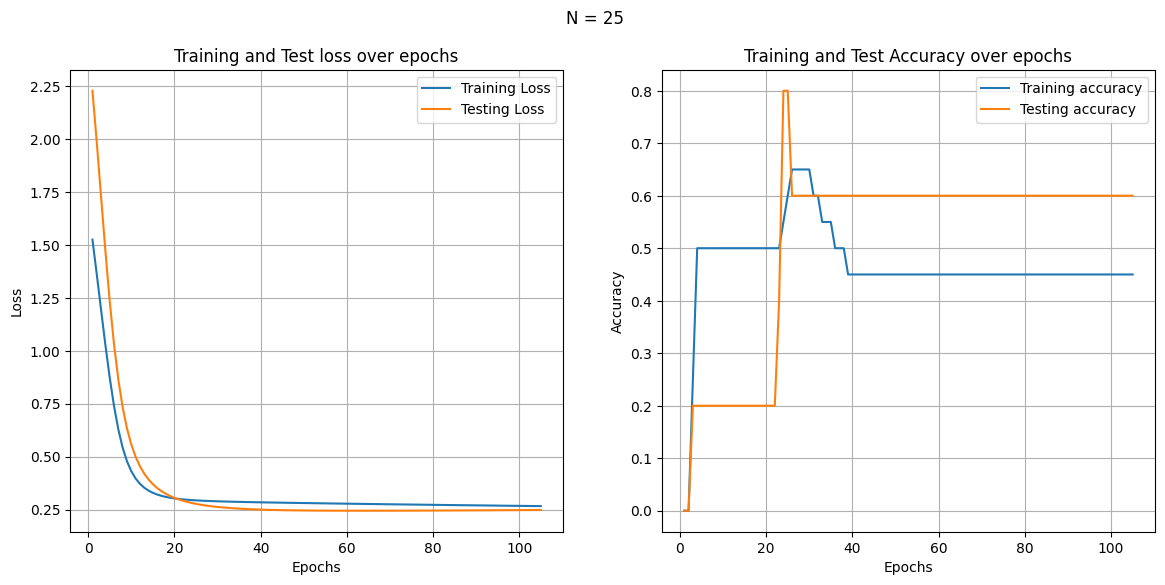

Results For N = 25:
Training Loss at the end of training:  0.2661092119791706
Training accuracy at the end of training:  0.45
Testing Loss at the end of training:  0.2480263656320651
Testing accuracy at the end of training:  0.6


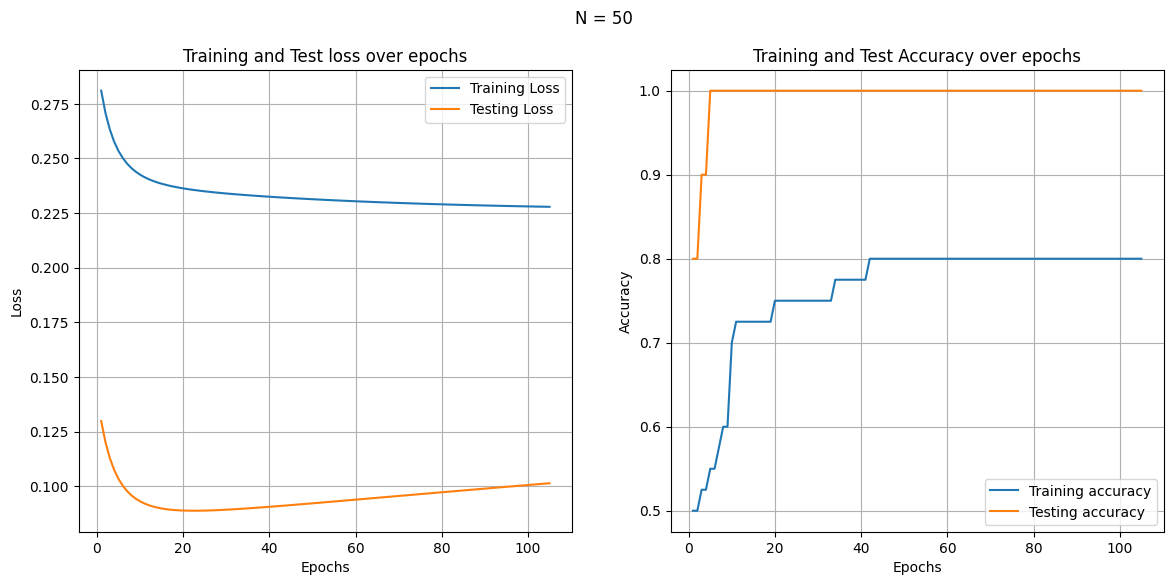

Results For N = 50:
Training Loss at the end of training:  0.22781669526640816
Training accuracy at the end of training:  0.8
Testing Loss at the end of training:  0.1013834684109246
Testing accuracy at the end of training:  1.0


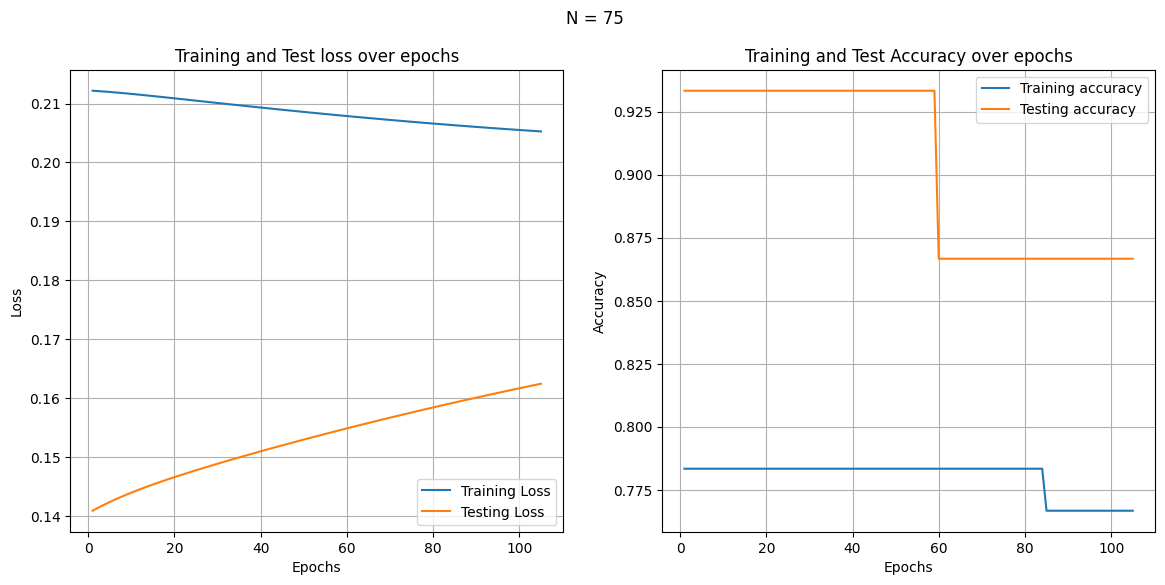

Results For N = 75:
Training Loss at the end of training:  0.20521842755716438
Training accuracy at the end of training:  0.7666666666666667
Testing Loss at the end of training:  0.16244226360388014
Testing accuracy at the end of training:  0.8666666666666667


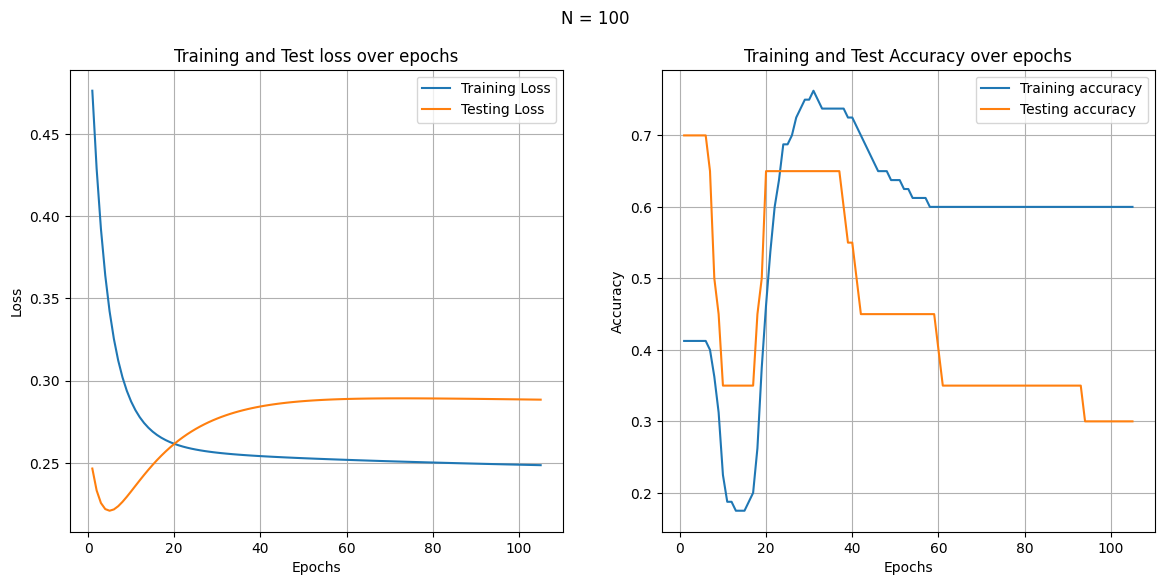

Results For N = 100:
Training Loss at the end of training:  0.24852631507939585
Training accuracy at the end of training:  0.6
Testing Loss at the end of training:  0.28843945434586854
Testing accuracy at the end of training:  0.3


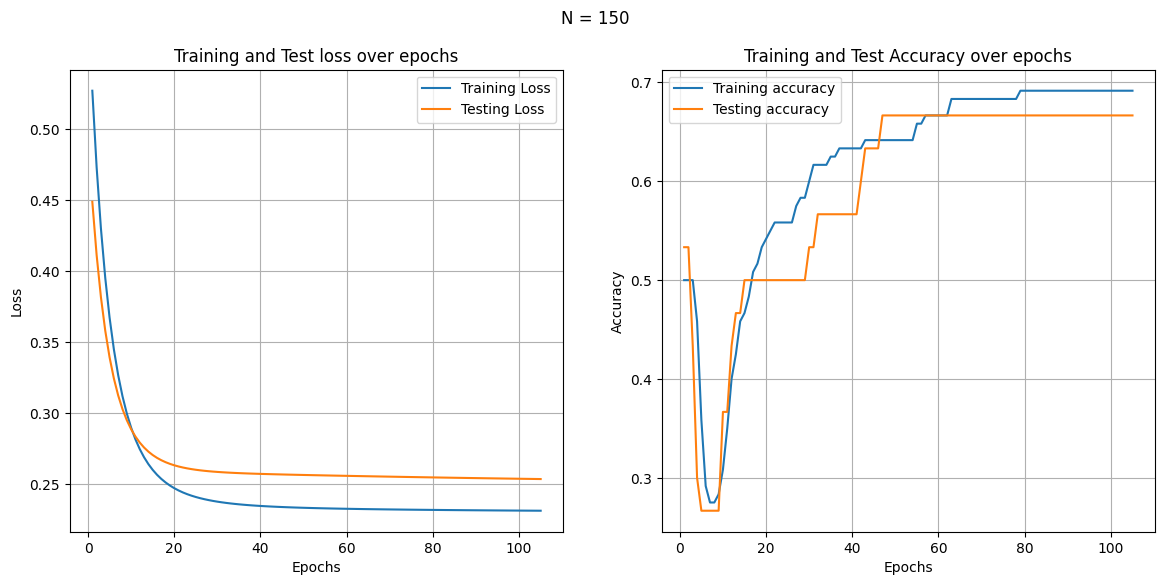

Results For N = 150:
Training Loss at the end of training:  0.23133686078903418
Training accuracy at the end of training:  0.6916666666666667
Testing Loss at the end of training:  0.25363871130769244
Testing accuracy at the end of training:  0.6666666666666666


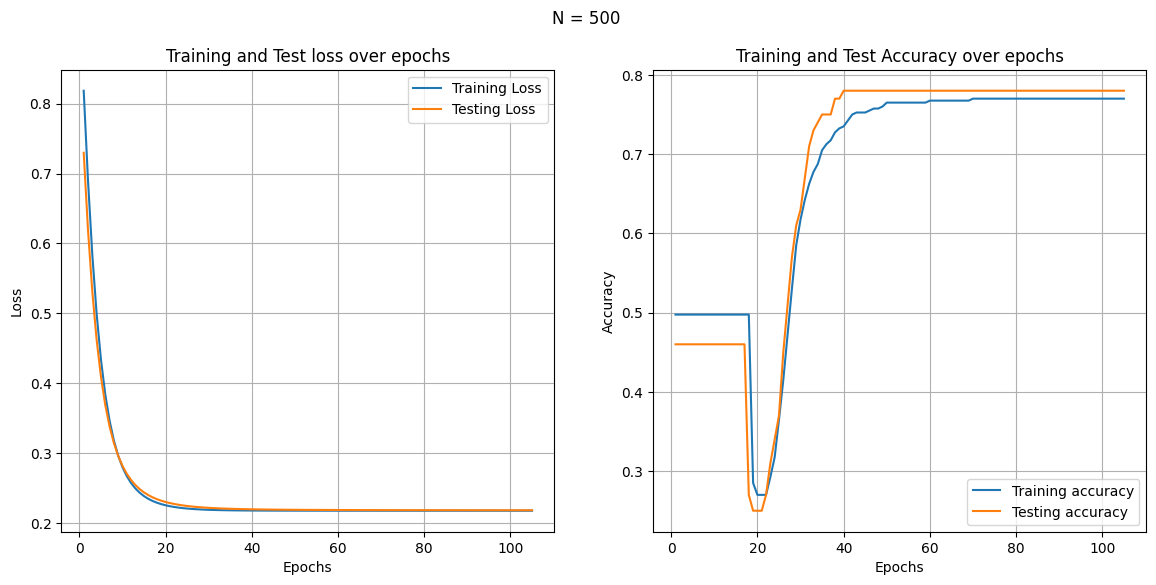

Results For N = 500:
Training Loss at the end of training:  0.21787611854774183
Training accuracy at the end of training:  0.77
Testing Loss at the end of training:  0.2185166232805123
Testing accuracy at the end of training:  0.78


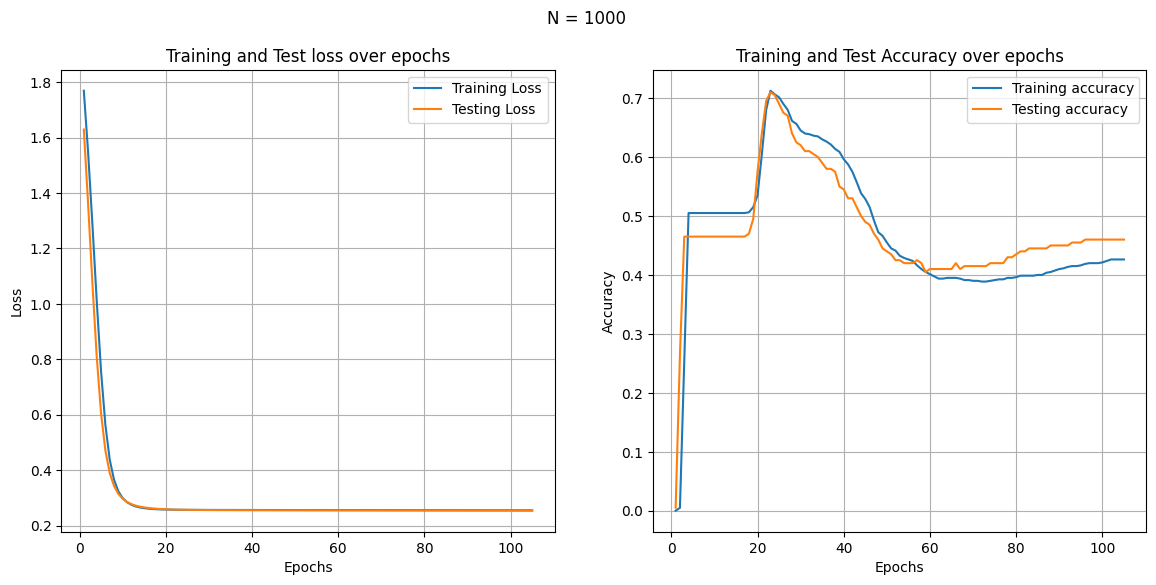

Results For N = 1000:
Training Loss at the end of training:  0.25487835384115815
Training accuracy at the end of training:  0.42625
Testing Loss at the end of training:  0.2534310308331601
Testing accuracy at the end of training:  0.46


In [18]:
######################################################
## Learning XOR with Deterministic gradient Descent ##
######################################################
for N in [25,50,75,100,150,500,1000]:
  #number of Samples
  np.random.seed(10)
  X, Y = generate_data(N, 'XOR')
  X = np.concatenate((np.ones((N,1)), X), axis = 1)
  permutation = np.random.permutation(len(X))
  X = X[permutation]
  Y = Y[permutation]
  #train-test split
  split = int(0.8*len(X))
  X_train = X[:split]
  Y_train = Y[:split]
  X_test = X[split:]
  Y_test = Y[split:]

  Y_train = Y_train.reshape(-1,1)
  Y_test = Y_test.reshape(-1,1)

  #hyperparameters
  learning_rate = 0.1
  epochs = 105
  batch_size = N
  input_nodes = 3   ## 2 + 1(for bias)
  hidden_nodes = 3  ## 2 + 1(for bias)
  output_nodes = 1
  epoch_vals = np.arange(1, epochs+1)

  #training
  xor_ANN = ArtificialNeuralNetwork(input_nodes, hidden_nodes, output_nodes)
  loss_values_training, accuracy_values_training, loss_values_testing, accuracy_values_testing = xor_ANN.train_network(X_train, X_test, Y_train, Y_test, epochs, batch_size, learning_rate, 'DGD')

  #Require Plots
  fig, ax = plt.subplots(1, 2, figsize = (14,6))
  fig.suptitle(f"N = {N}")
  ax[0].set_title("Training and Test loss over epochs")
  ax[0].plot(epoch_vals, loss_values_training, label = "Training Loss")
  ax[0].plot(epoch_vals, loss_values_testing, label = "Testing Loss")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Loss")
  ax[0].grid(True)

  ax[1].set_title("Training and Test Accuracy over epochs")
  ax[1].plot(epoch_vals, accuracy_values_training, label = "Training accuracy")
  ax[1].plot(epoch_vals, accuracy_values_testing, label = "Testing accuracy")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Accuracy")
  ax[1].grid(True)
  plt.show()

  y_pred_train = xor_ANN.forwardpass(X_train)
  loss_tr = xor_ANN.loss_mse(Y_train, xor_ANN.Y_pred)
  y_pred_test = xor_ANN.forwardpass(X_test)
  loss_te = xor_ANN.loss_mse(Y_test, xor_ANN.Y_pred)
  print(f"Results For N = {N}:")
  print("Training Loss at the end of training: ", loss_tr)
  print("Training accuracy at the end of training: ", xor_ANN.accuracy(Y_train, y_pred_train))
  print("Testing Loss at the end of training: ", loss_te)
  print("Testing accuracy at the end of training: ", xor_ANN.accuracy(Y_test, y_pred_test))

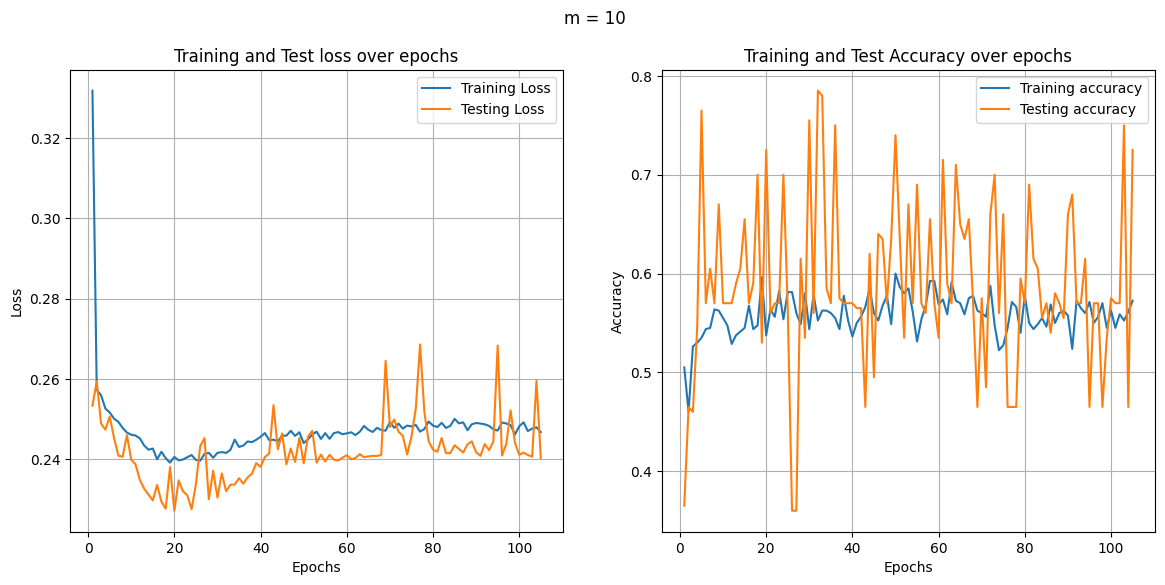

Results For m = 10:
Training Loss at the end of training:  0.24843368215143805
Training accuracy at the end of training:  0.69
Testing Loss at the end of training:  0.2403758618709871
Testing accuracy at the end of training:  0.725


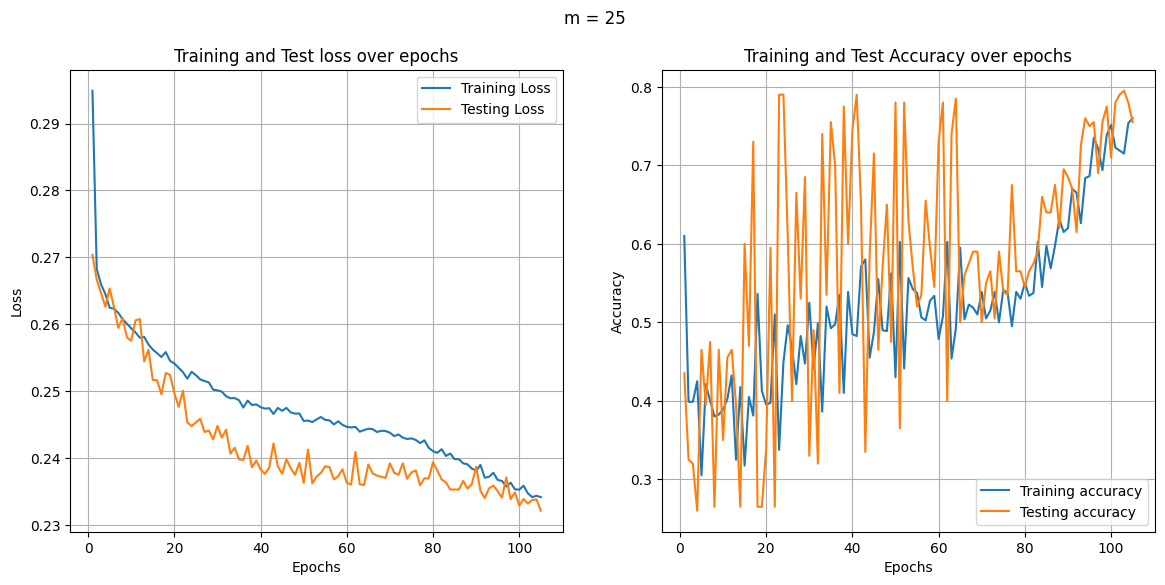

Results For m = 25:
Training Loss at the end of training:  0.23317865623334855
Training accuracy at the end of training:  0.78625
Testing Loss at the end of training:  0.23219058034092563
Testing accuracy at the end of training:  0.755


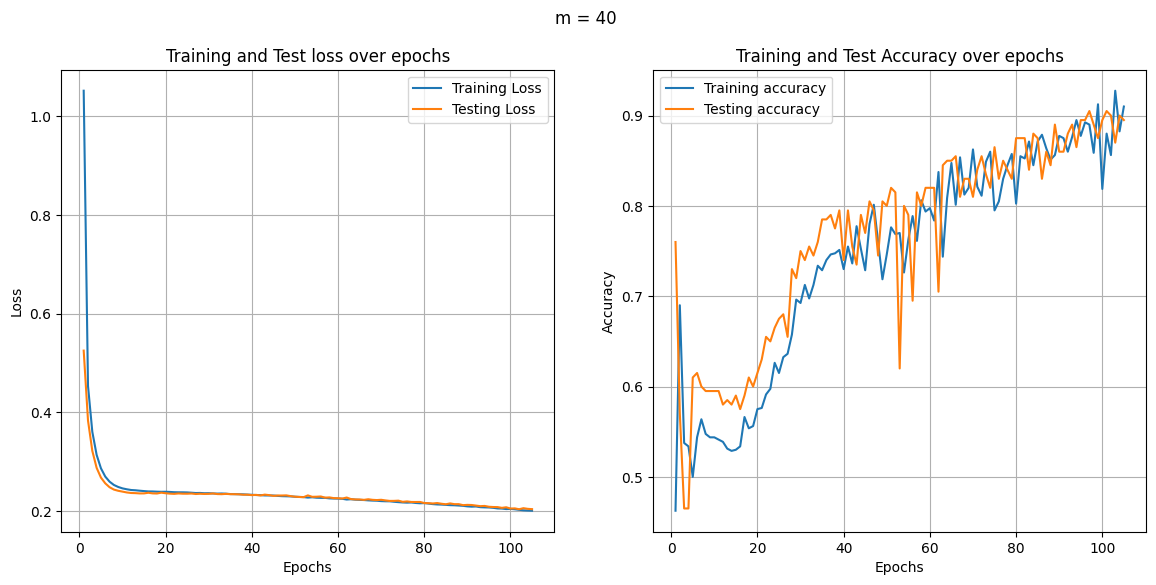

Results For m = 40:
Training Loss at the end of training:  0.19998032366858878
Training accuracy at the end of training:  0.9
Testing Loss at the end of training:  0.20408073479480446
Testing accuracy at the end of training:  0.895


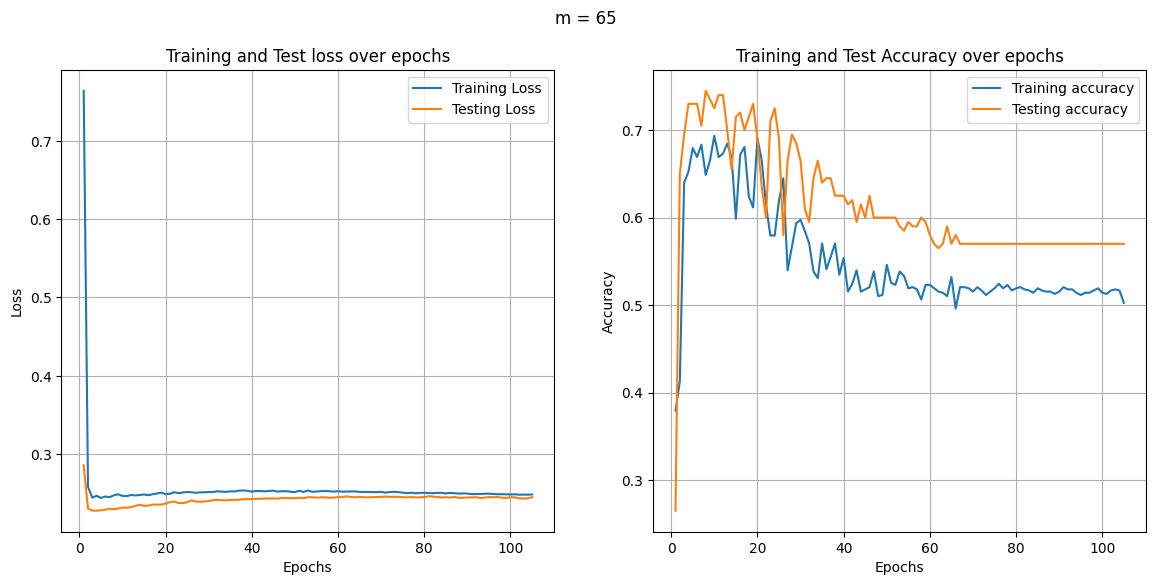

Results For m = 65:
Training Loss at the end of training:  0.24770292563180796
Training accuracy at the end of training:  0.51625
Testing Loss at the end of training:  0.24508605986449275
Testing accuracy at the end of training:  0.57


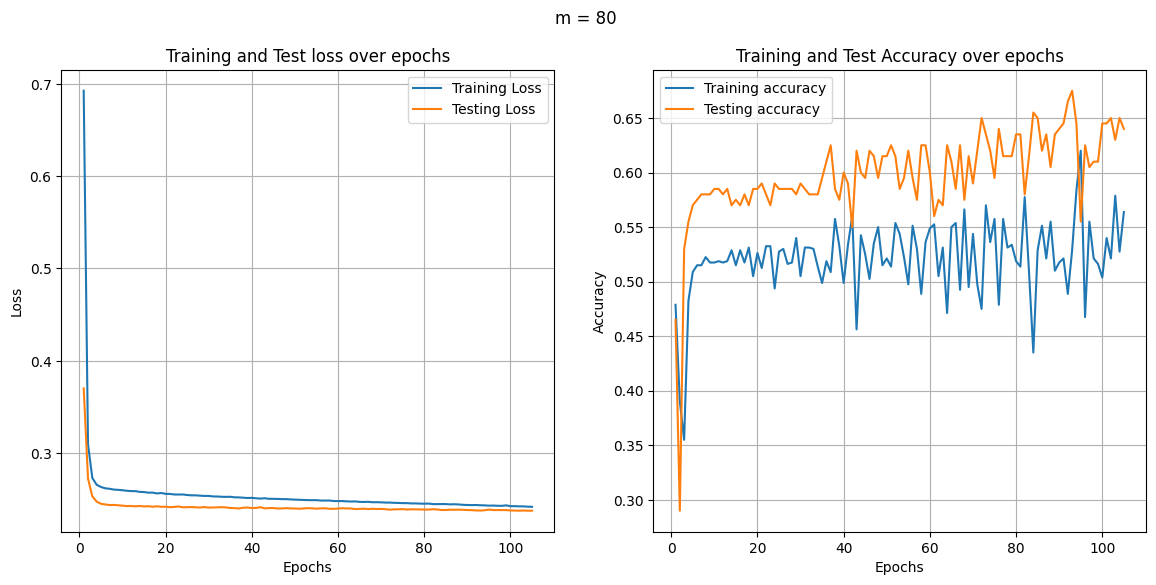

Results For m = 80:
Training Loss at the end of training:  0.24150525540662549
Training accuracy at the end of training:  0.55875
Testing Loss at the end of training:  0.23756715912471346
Testing accuracy at the end of training:  0.64


In [19]:
######################################################
## Learning XOR with Stochastic gradient Descent ##
######################################################
N = 1000
np.random.seed(10)
X, Y = generate_data(N, 'XOR')
X = np.concatenate((np.ones((N,1)), X), axis = 1)
permutation = np.random.permutation(len(X))
X = X[permutation]
Y = Y[permutation]

#train-test split
split = int(0.8*len(X))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

#hyperparameters/
learning_rate = 0.1
epochs = 105
input_nodes = 3
hidden_nodes = 3
output_nodes = 1
epoch_vals = np.arange(1, epochs+1)

for m in [10,25,40,65,80]:
  #The batch size
  batch_size = m

  #training
  xor_ANN = ArtificialNeuralNetwork(input_nodes, hidden_nodes, output_nodes)
  loss_values_training, accuracy_values_training, loss_values_testing, accuracy_values_testing = xor_ANN.train_network(X_train, X_test, Y_train, Y_test, epochs, batch_size, learning_rate, 'SGD')

  #Require Plots
  fig, ax = plt.subplots(1, 2, figsize = (14,6))
  fig.suptitle(f"m = {m}")
  ax[0].set_title("Training and Test loss over epochs")
  ax[0].plot(epoch_vals, loss_values_training, label = "Training Loss")
  ax[0].plot(epoch_vals, loss_values_testing, label = "Testing Loss")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Loss")
  ax[0].grid(True)

  ax[1].set_title("Training and Test Accuracy over epochs")
  ax[1].plot(epoch_vals, accuracy_values_training, label = "Training accuracy")
  ax[1].plot(epoch_vals, accuracy_values_testing, label = "Testing accuracy")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Accuracy")
  ax[1].grid(True)
  plt.show()

  y_pred_train = xor_ANN.forwardpass(X_train)
  loss_tr = xor_ANN.loss_mse(Y_train, xor_ANN.Y_pred)
  y_pred_test = xor_ANN.forwardpass(X_test)
  # print(Y_test)
  # print(y_pred_test)
  loss_te = xor_ANN.loss_mse(Y_test, xor_ANN.Y_pred)
  print(f"Results For m = {m}:")
  print("Training Loss at the end of training: ", loss_tr)
  print("Training accuracy at the end of training: ", xor_ANN.accuracy(Y_train, y_pred_train))
  print("Testing Loss at the end of training: ", loss_te)
  print("Testing accuracy at the end of training: ", xor_ANN.accuracy(Y_test, y_pred_test))

# 2) AND

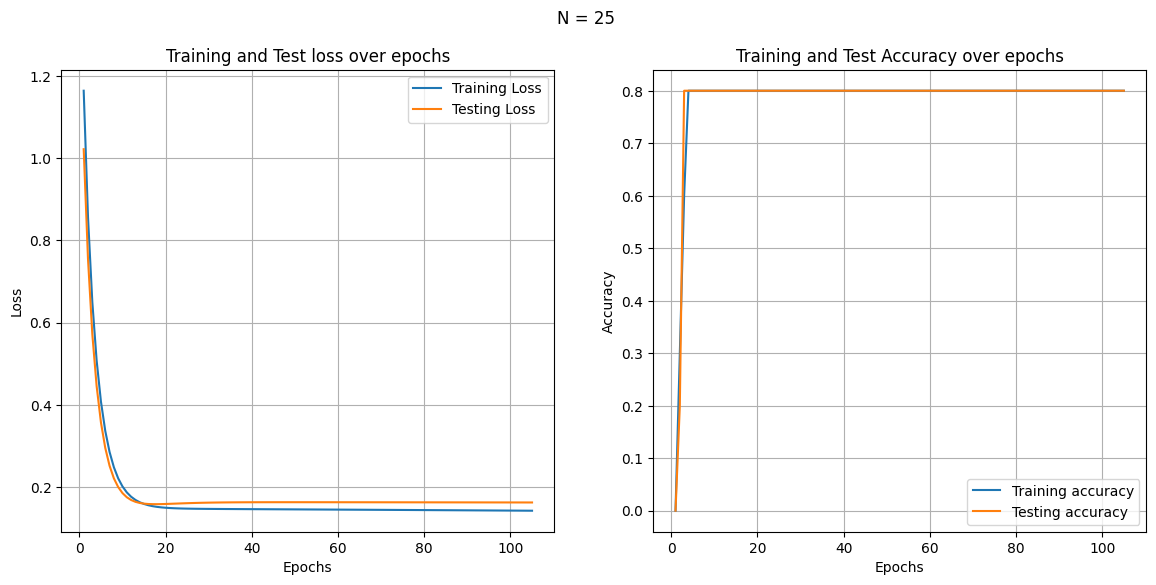

Results For N = 25:
Training Loss at the end of training:  0.14212047160240332
Training accuracy at the end of training:  0.8
Testing Loss at the end of training:  0.16225812535864784
Testing accuracy at the end of training:  0.8


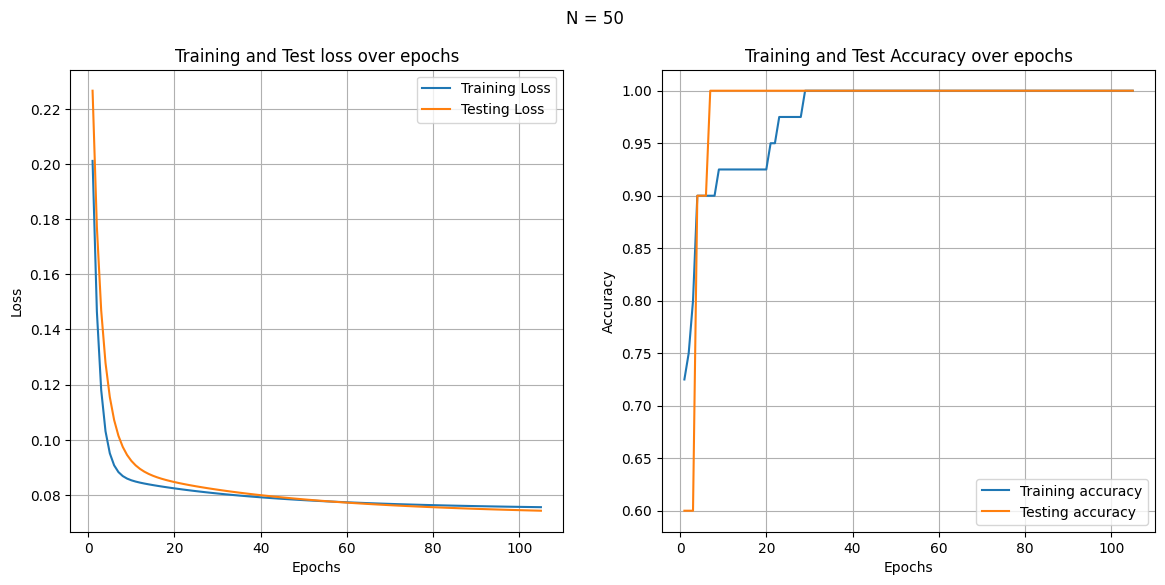

Results For N = 50:
Training Loss at the end of training:  0.07553669548808964
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.07427329425371772
Testing accuracy at the end of training:  1.0


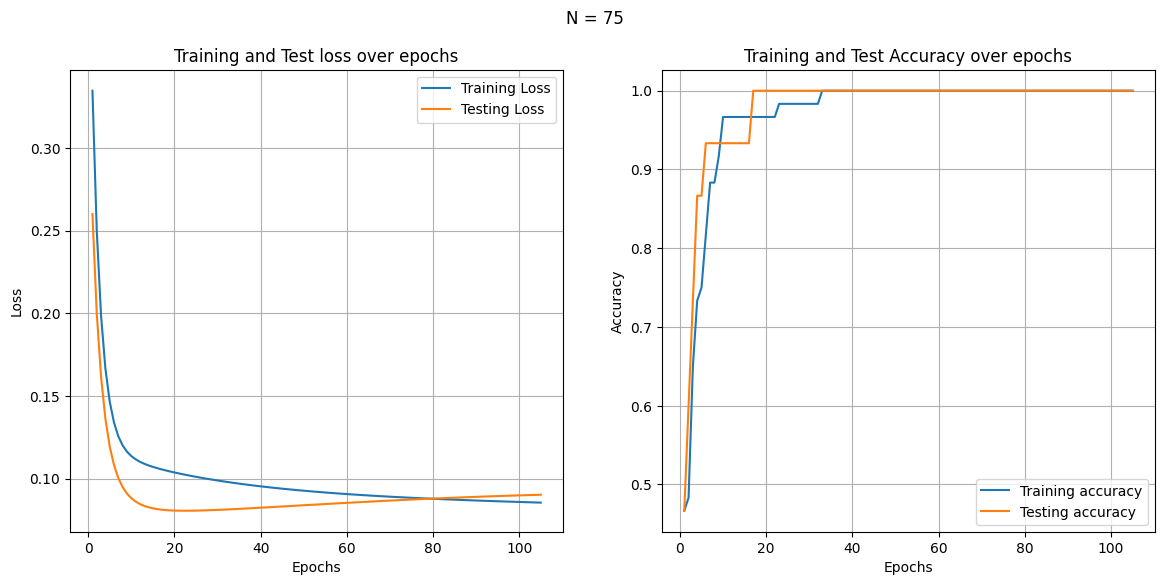

Results For N = 75:
Training Loss at the end of training:  0.08541550952837552
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.09025202141339518
Testing accuracy at the end of training:  1.0


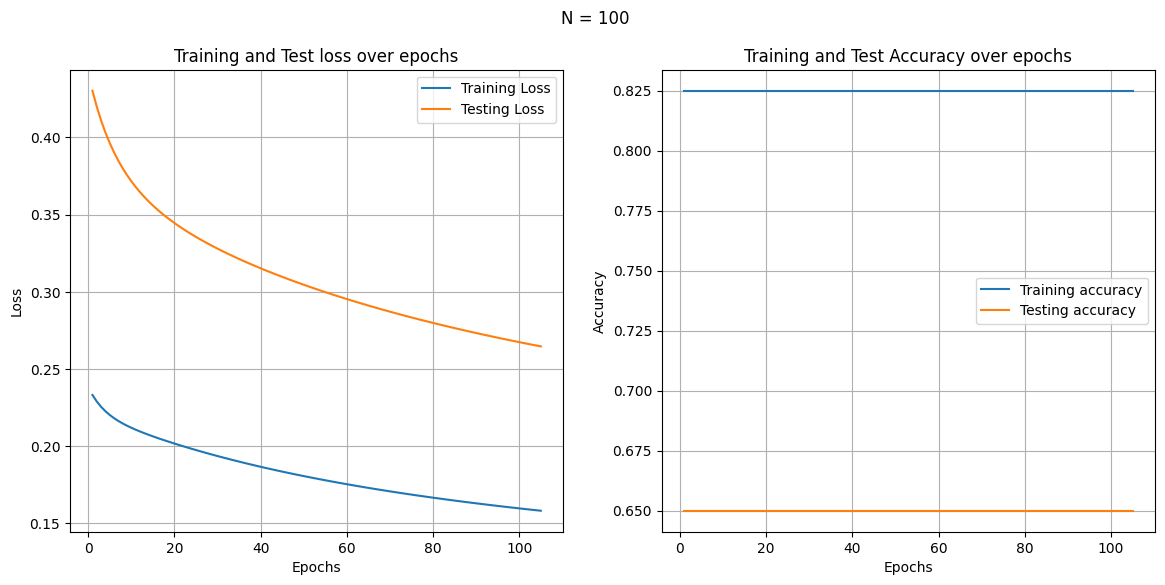

Results For N = 100:
Training Loss at the end of training:  0.15790596111839109
Training accuracy at the end of training:  0.825
Testing Loss at the end of training:  0.2646273520463936
Testing accuracy at the end of training:  0.65


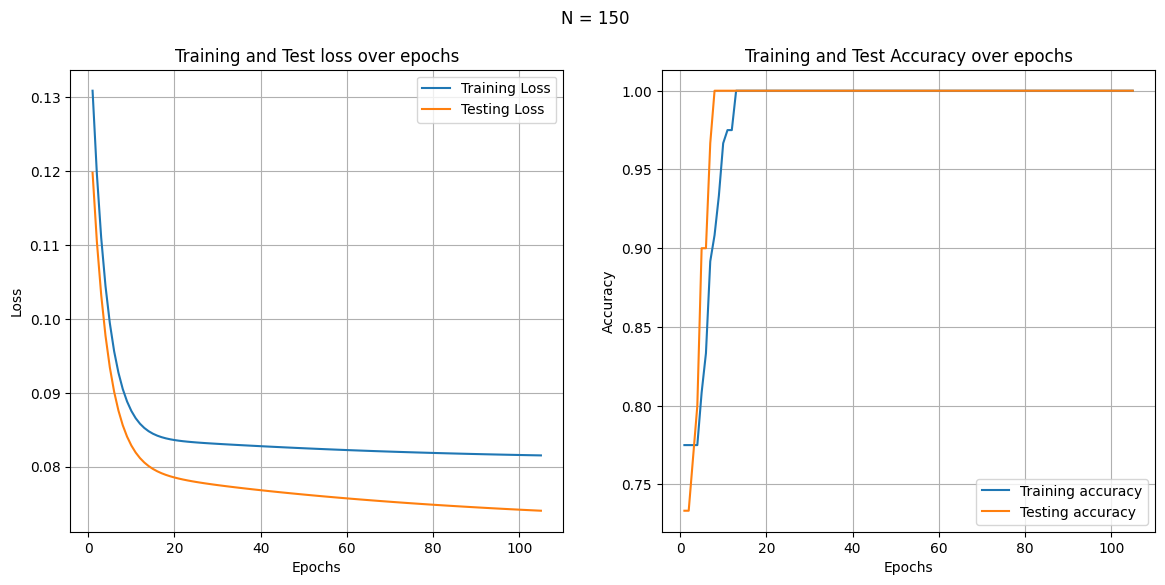

Results For N = 150:
Training Loss at the end of training:  0.08150809138271678
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.07403068839389998
Testing accuracy at the end of training:  1.0


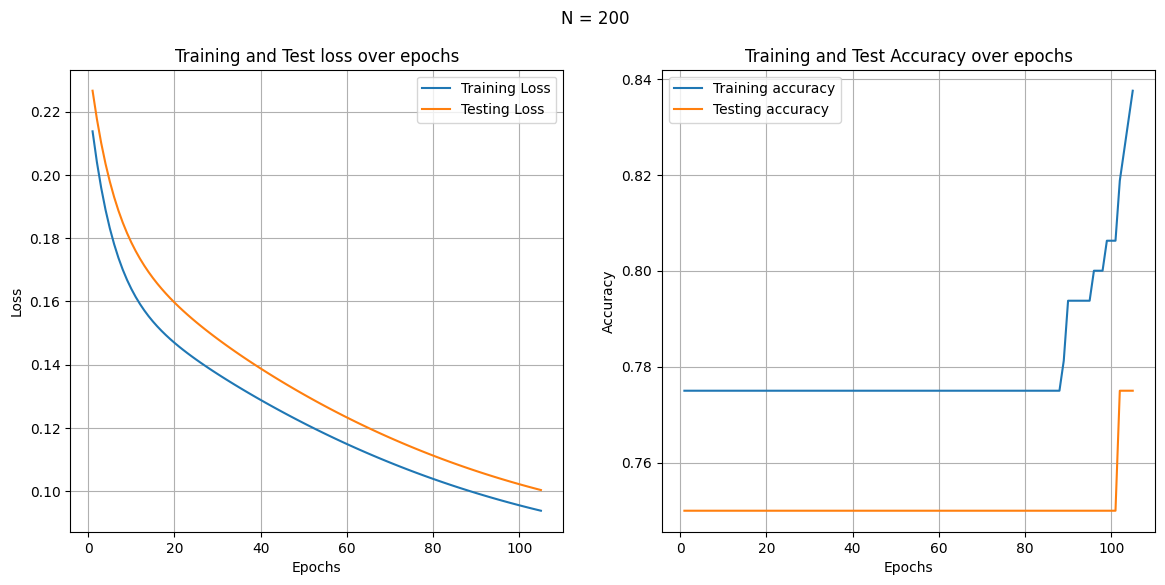

Results For N = 200:
Training Loss at the end of training:  0.09349475120588799
Training accuracy at the end of training:  0.8375
Testing Loss at the end of training:  0.10035745141665142
Testing accuracy at the end of training:  0.775


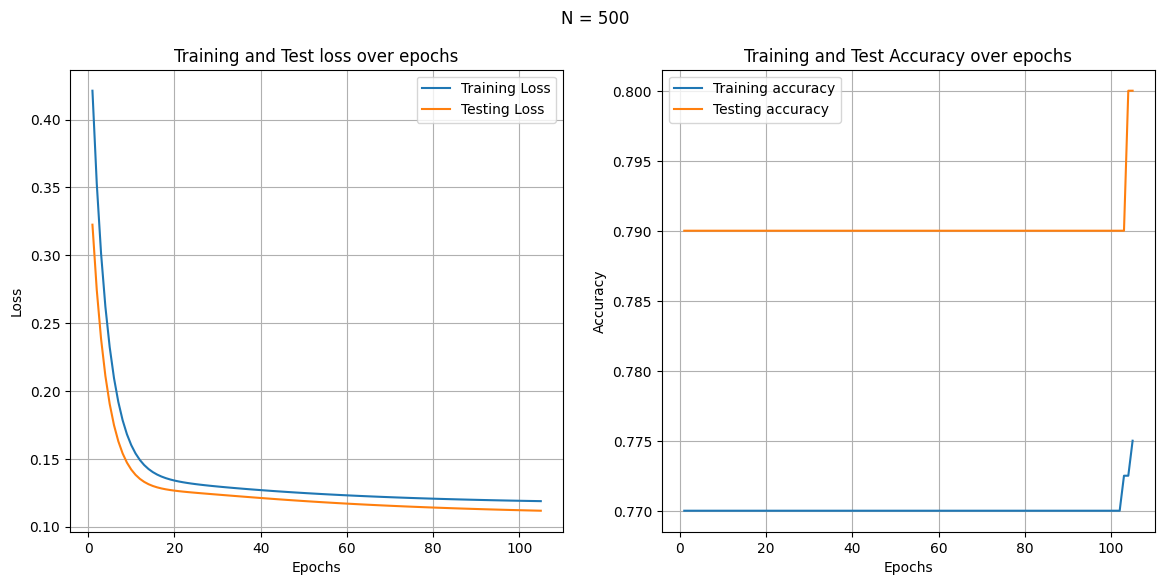

Results For N = 500:
Training Loss at the end of training:  0.1187062532049978
Training accuracy at the end of training:  0.775
Testing Loss at the end of training:  0.11169990517980861
Testing accuracy at the end of training:  0.8


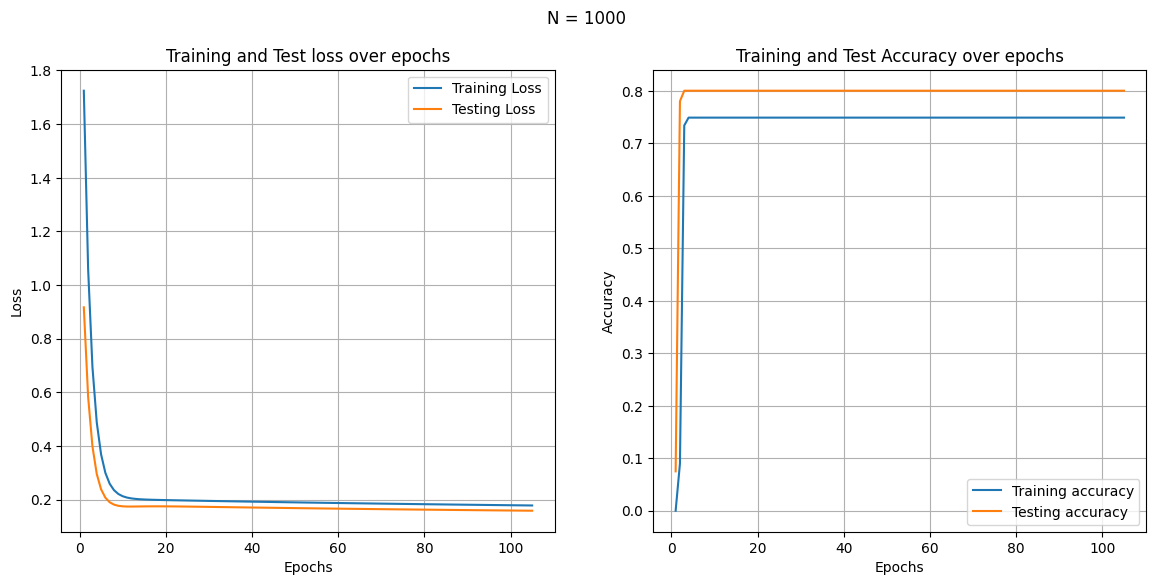

Results For N = 1000:
Training Loss at the end of training:  0.1779181861235832
Training accuracy at the end of training:  0.74875
Testing Loss at the end of training:  0.15852403181239627
Testing accuracy at the end of training:  0.8


In [ ]:
######################################################
## Learning AND with Deterministic gradient Descent ##
######################################################
for N in [25,50,75,100,150,200,500,1000]:
  #number of Samples
  np.random.seed(10)
  X, Y = generate_data(N, 'AND')
  X = np.concatenate((np.ones((N,1)), X), axis = 1)
  permutation = np.random.permutation(len(X))
  X = X[permutation]
  Y = Y[permutation]
  #train-test split
  split = int(0.8*len(X))
  X_train = X[:split]
  Y_train = Y[:split]
  X_test = X[split:]
  Y_test = Y[split:]

  Y_train = Y_train.reshape(-1,1)
  Y_test = Y_test.reshape(-1,1)

  #hyperparameters
  learning_rate = 0.1
  epochs = 105
  batch_size = N
  input_nodes = 3
  hidden_nodes = 3
  output_nodes = 1
  epoch_vals = np.arange(1, epochs+1)

  #training
  and_ANN = ArtificialNeuralNetwork(input_nodes, hidden_nodes, output_nodes, 'AND')
  loss_values_training, accuracy_values_training, loss_values_testing, accuracy_values_testing = and_ANN.train_network(X_train, X_test, Y_train, Y_test, epochs, batch_size, learning_rate, 'DGD')

  #Require Plots
  fig, ax = plt.subplots(1, 2, figsize = (14,6))
  fig.suptitle(f"N = {N}")
  ax[0].set_title("Training and Test loss over epochs")
  ax[0].plot(epoch_vals, loss_values_training, label = "Training Loss")
  ax[0].plot(epoch_vals, loss_values_testing, label = "Testing Loss")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Loss")
  ax[0].grid(True)

  ax[1].set_title("Training and Test Accuracy over epochs")
  ax[1].plot(epoch_vals, accuracy_values_training, label = "Training accuracy")
  ax[1].plot(epoch_vals, accuracy_values_testing, label = "Testing accuracy")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Accuracy")
  ax[1].grid(True)
  plt.show()

  y_pred_train = and_ANN.forwardpass(X_train)
  loss_tr = and_ANN.loss_mse(Y_train, y_pred_train)
  y_pred_test = and_ANN.forwardpass(X_test)
  loss_te = and_ANN.loss_mse(Y_test, y_pred_test)
  print(f"Results For N = {N}:")
  print("Training Loss at the end of training: ", loss_tr)
  print("Training accuracy at the end of training: ", and_ANN.accuracy(Y_train, y_pred_train))
  print("Testing Loss at the end of training: ", loss_te)
  print("Testing accuracy at the end of training: ", and_ANN.accuracy(Y_test, y_pred_test))

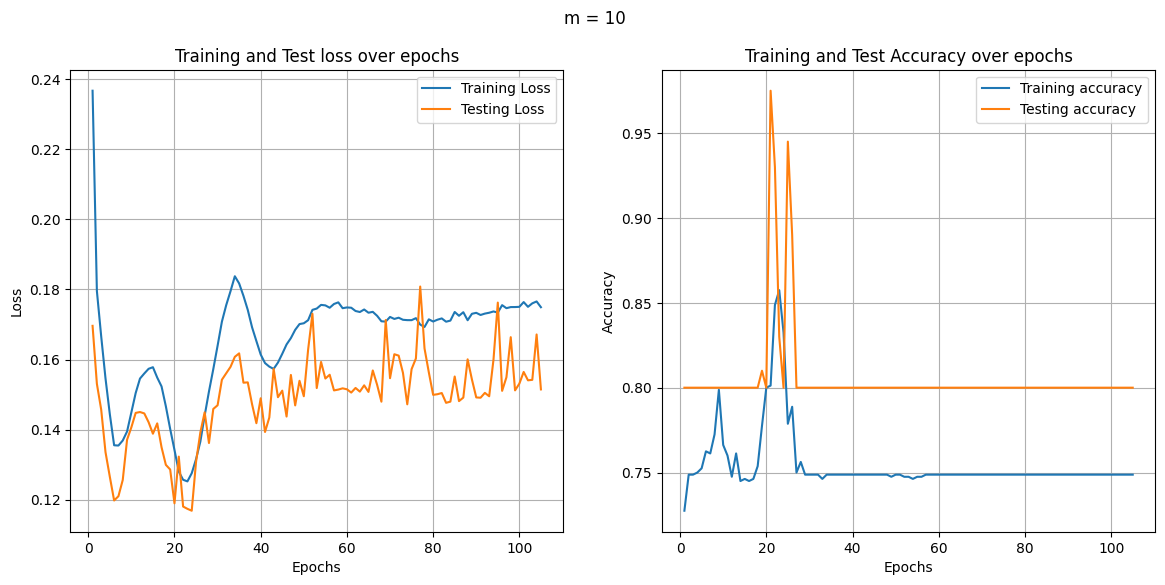

Results For m = 10:
Training Loss at the end of training:  0.17609285368332117
Training accuracy at the end of training:  0.74875
Testing Loss at the end of training:  0.15146348127632117
Testing accuracy at the end of training:  0.8


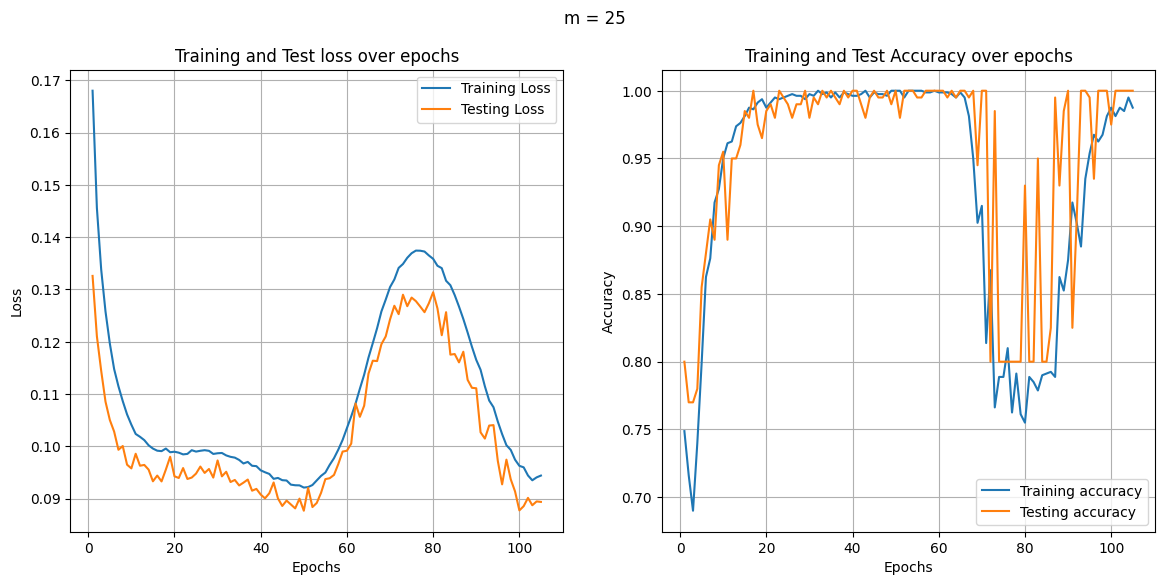

Results For m = 25:
Training Loss at the end of training:  0.09341740313618187
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.08936604762153166
Testing accuracy at the end of training:  1.0


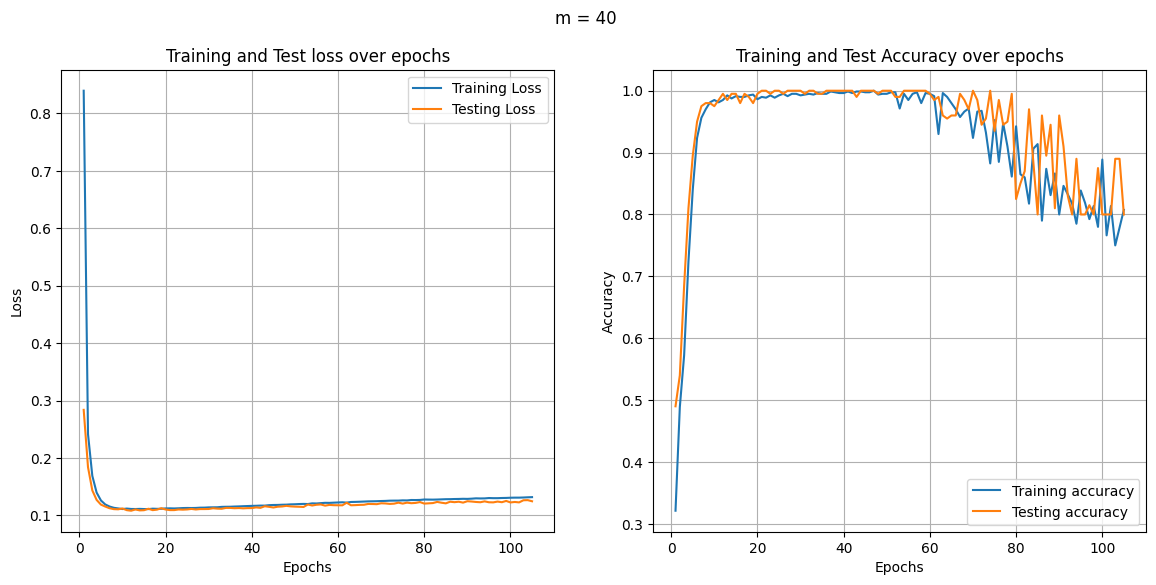

Results For m = 40:
Training Loss at the end of training:  0.13127569064444383
Training accuracy at the end of training:  0.74875
Testing Loss at the end of training:  0.12466307787071873
Testing accuracy at the end of training:  0.8


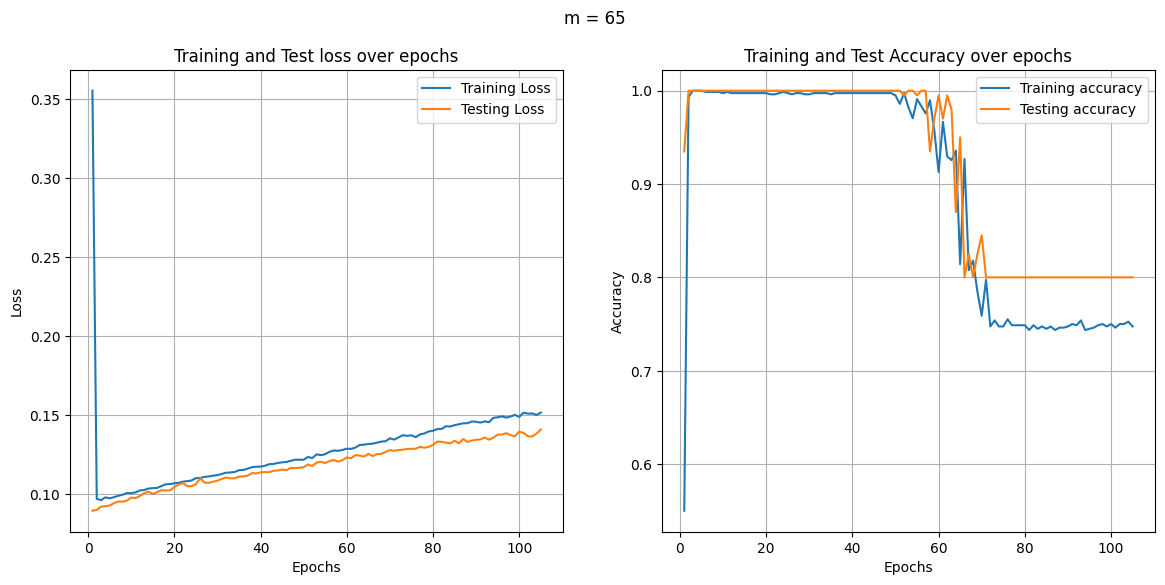

Results For m = 65:
Training Loss at the end of training:  0.151801443559956
Training accuracy at the end of training:  0.74875
Testing Loss at the end of training:  0.14089803283077504
Testing accuracy at the end of training:  0.8


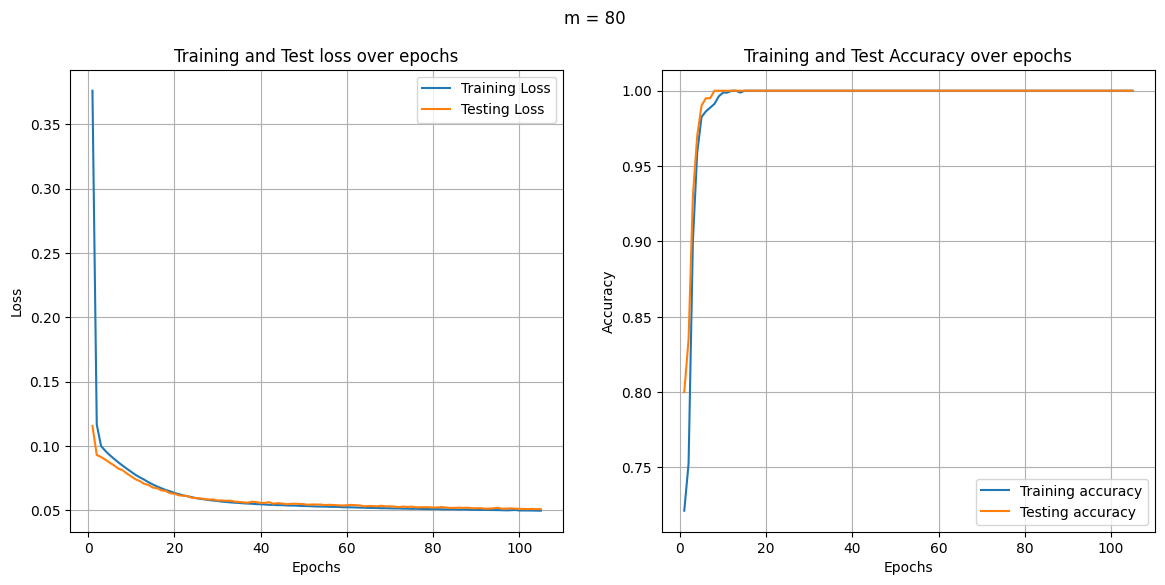

Results For m = 80:
Training Loss at the end of training:  0.04942812182557763
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.05081219717514229
Testing accuracy at the end of training:  1.0


In [ ]:
######################################################
## Learning AND with Stochastic gradient Descent ##
######################################################
N = 1000
np.random.seed(10)
X, Y = generate_data(N, 'AND')
X = np.concatenate((np.ones((N,1)), X), axis = 1)
permutation = np.random.permutation(len(X))
X = X[permutation]
Y = Y[permutation]

#train-test split
split = int(0.8*len(X))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

#hyperparameters
learning_rate = 0.1
epochs = 105
input_nodes = 3
hidden_nodes = 3
output_nodes = 1
epoch_vals = np.arange(1, epochs+1)
for m in [10,25,40,65,80]:
  #The batch size
  batch_size = m

  #training
  and_ANN = ArtificialNeuralNetwork(input_nodes, hidden_nodes, output_nodes, 'AND')
  loss_values_training, accuracy_values_training, loss_values_testing, accuracy_values_testing = and_ANN.train_network(X_train, X_test, Y_train, Y_test, epochs, batch_size, learning_rate, 'SGD')

  #Require Plots
  fig, ax = plt.subplots(1, 2, figsize = (14,6))
  fig.suptitle(f"m = {m}")
  ax[0].set_title("Training and Test loss over epochs")
  ax[0].plot(epoch_vals, loss_values_training, label = "Training Loss")
  ax[0].plot(epoch_vals, loss_values_testing, label = "Testing Loss")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Loss")
  ax[0].grid(True)

  ax[1].set_title("Training and Test Accuracy over epochs")
  ax[1].plot(epoch_vals, accuracy_values_training, label = "Training accuracy")
  ax[1].plot(epoch_vals, accuracy_values_testing, label = "Testing accuracy")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Accuracy")
  ax[1].grid(True)
  plt.show()

  y_pred_train = and_ANN.forwardpass(X_train)
  loss_tr = and_ANN.loss_mse(Y_train, y_pred_train)
  y_pred_test = and_ANN.forwardpass(X_test)
  # print(Y_test)
  # print(y_pred_test)
  loss_te = and_ANN.loss_mse(Y_test, y_pred_test)
  print(f"Results For m = {m}:")
  print("Training Loss at the end of training: ", loss_tr)
  print("Training accuracy at the end of training: ", and_ANN.accuracy(Y_train, y_pred_train))
  print("Testing Loss at the end of training: ", loss_te)
  print("Testing accuracy at the end of training: ", and_ANN.accuracy(Y_test, y_pred_test))

# 3) OR

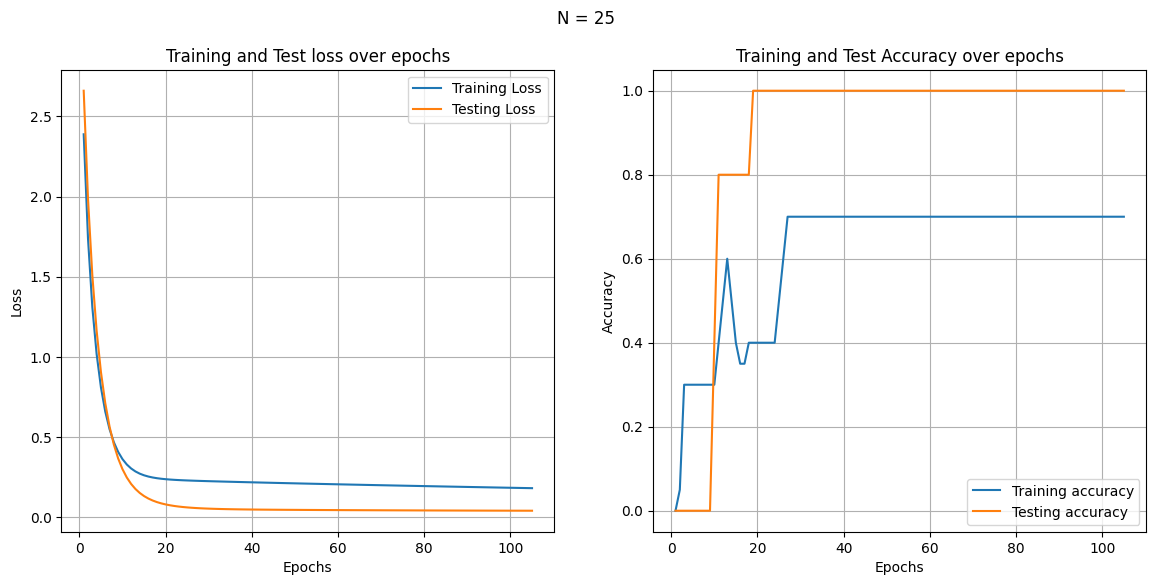

Results For N = 25:
Training Loss at the end of training:  0.18078153465739955
Training accuracy at the end of training:  0.7
Testing Loss at the end of training:  0.04067278127750139
Testing accuracy at the end of training:  1.0


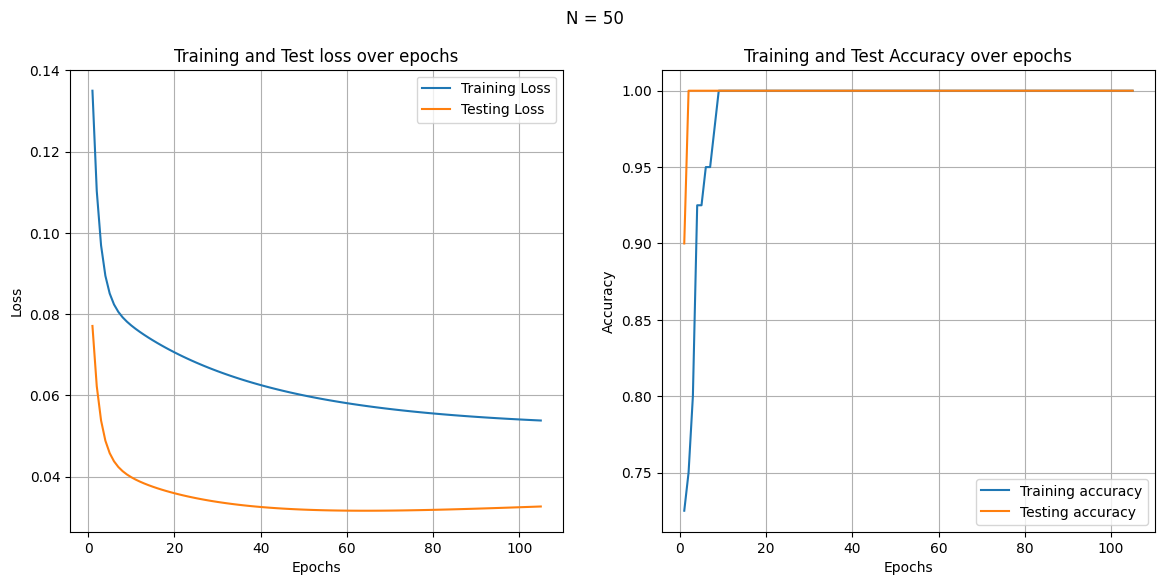

Results For N = 50:
Training Loss at the end of training:  0.053757829634302846
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.03263476663815671
Testing accuracy at the end of training:  1.0


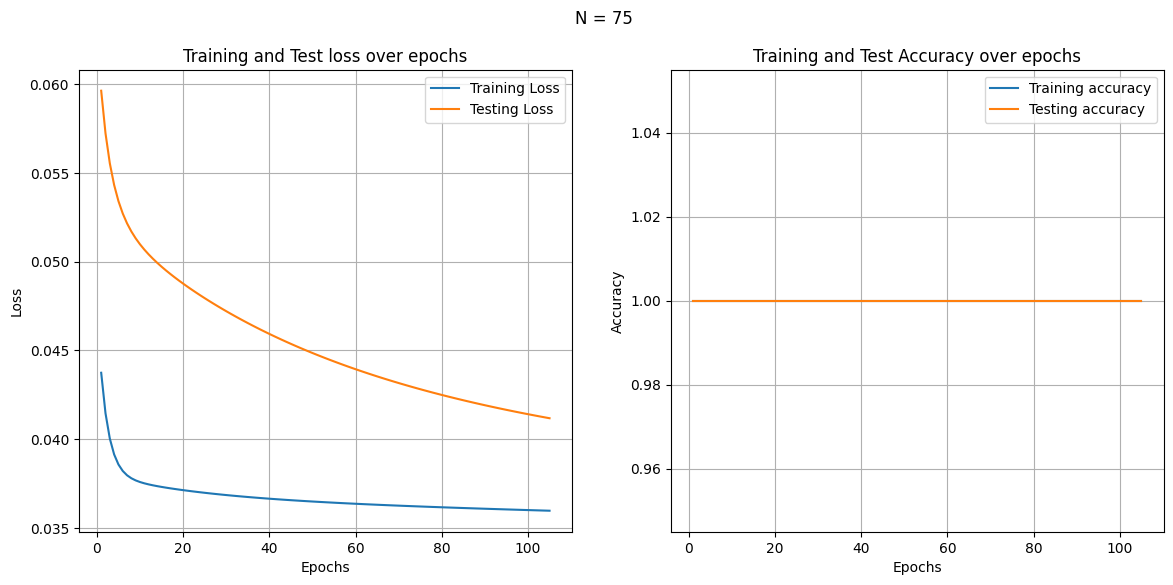

Results For N = 75:
Training Loss at the end of training:  0.03595611286125713
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.041173495669496914
Testing accuracy at the end of training:  1.0


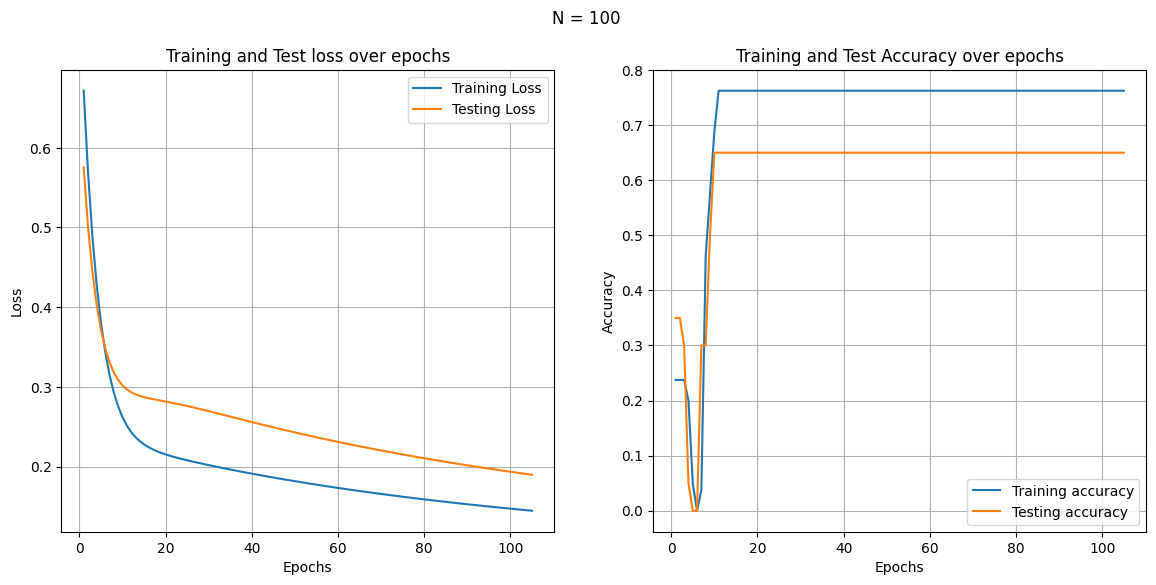

Results For N = 100:
Training Loss at the end of training:  0.14410270059343877
Training accuracy at the end of training:  0.7625
Testing Loss at the end of training:  0.18974557743198653
Testing accuracy at the end of training:  0.65


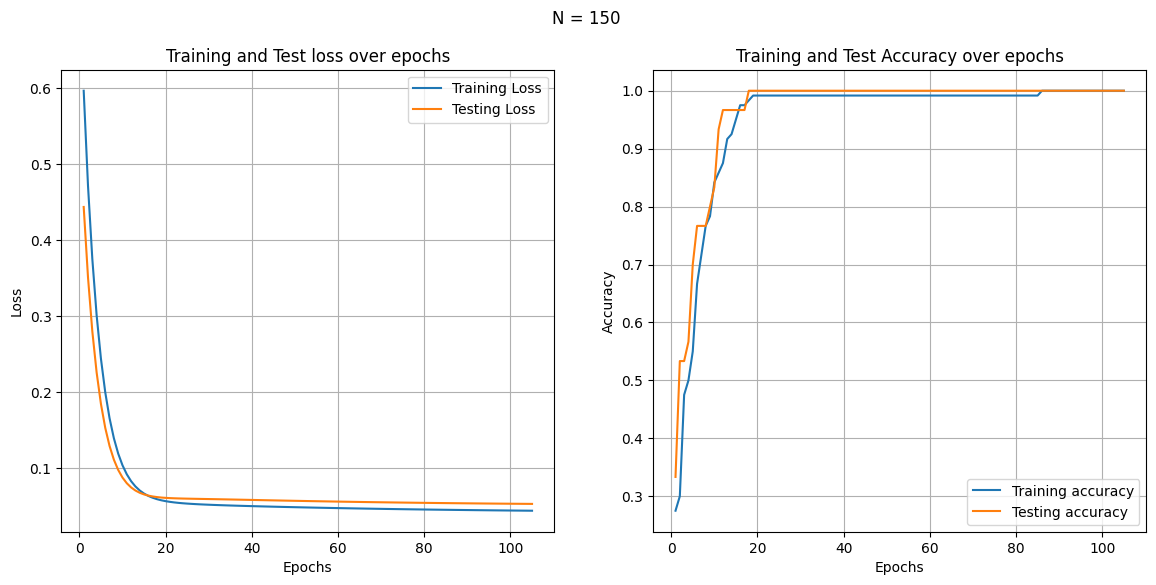

Results For N = 150:
Training Loss at the end of training:  0.04361817302736441
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.052655176011177314
Testing accuracy at the end of training:  1.0


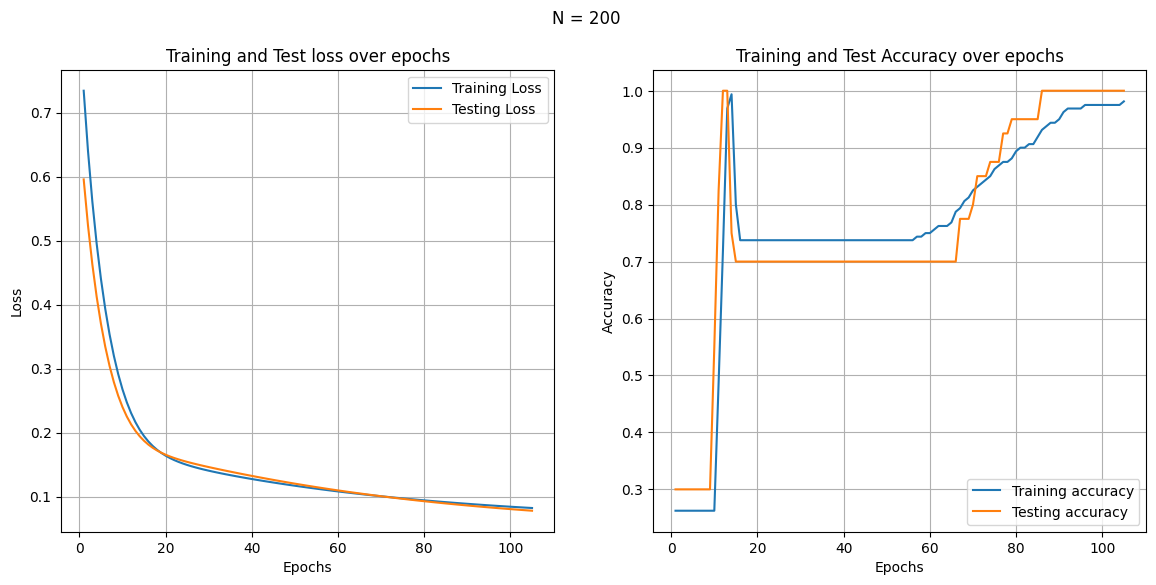

Results For N = 200:
Training Loss at the end of training:  0.08167247368857769
Training accuracy at the end of training:  0.9875
Testing Loss at the end of training:  0.07779886945699044
Testing accuracy at the end of training:  1.0


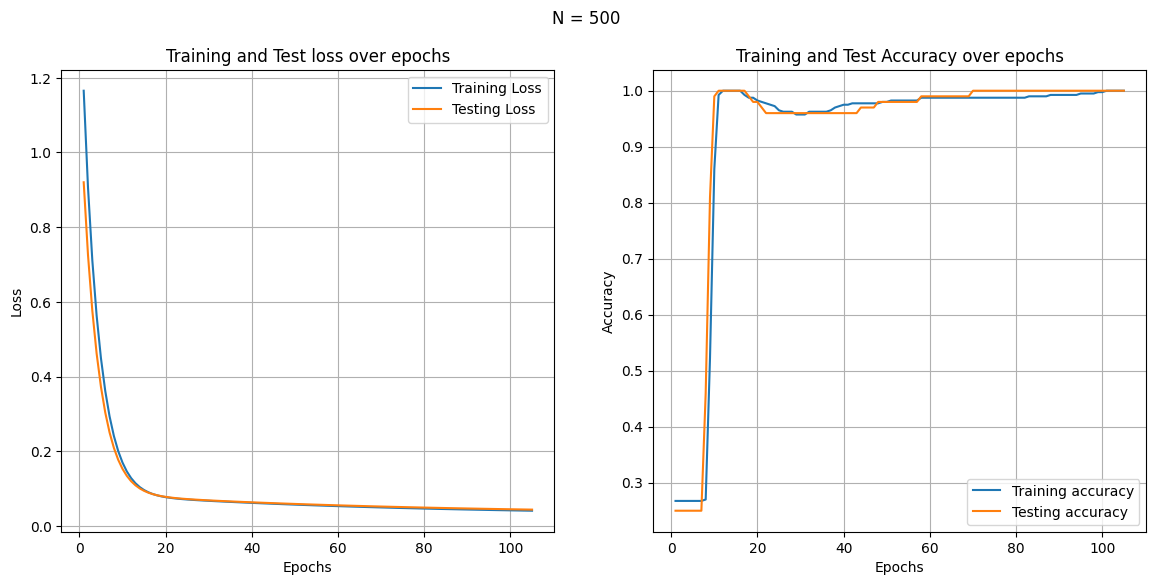

Results For N = 500:
Training Loss at the end of training:  0.04054954888563731
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.04369835003558383
Testing accuracy at the end of training:  1.0


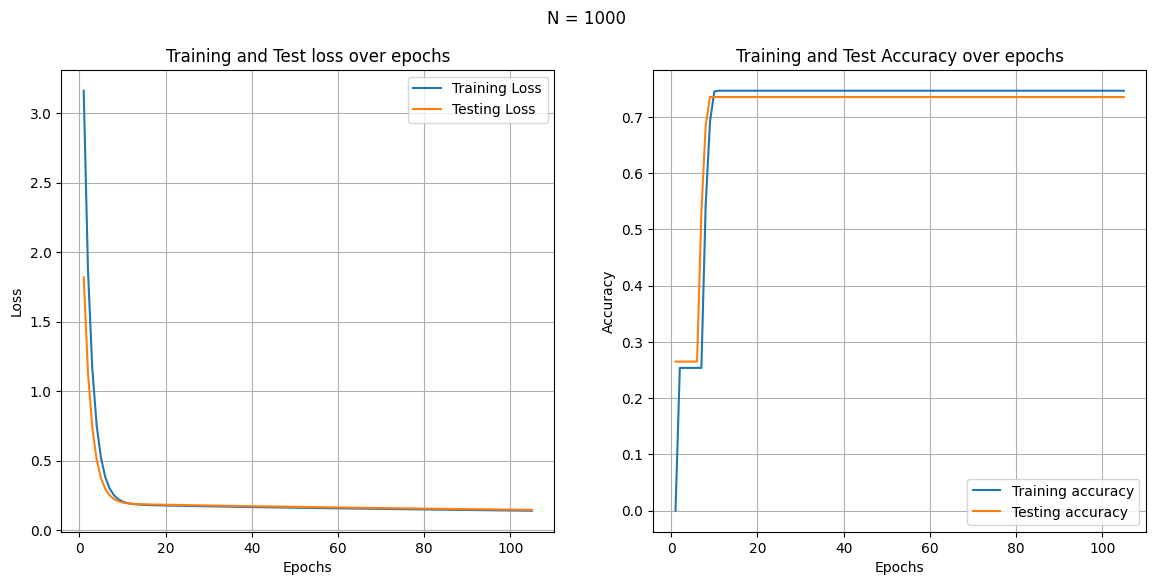

Results For N = 1000:
Training Loss at the end of training:  0.139504952183422
Training accuracy at the end of training:  0.74625
Testing Loss at the end of training:  0.1458558957499213
Testing accuracy at the end of training:  0.735


In [ ]:
######################################################
## Learning OR with Deterministic gradient Descent ##
######################################################
for N in [25,50,75,100,150,200,500,1000]:
  #number of Samples
  np.random.seed(10)
  X, Y = generate_data(N, 'OR')
  X = np.concatenate((np.ones((N,1)), X), axis = 1)
  permutation = np.random.permutation(len(X))
  X = X[permutation]
  Y = Y[permutation]
  #train-test split
  split = int(0.8*len(X))
  X_train = X[:split]
  Y_train = Y[:split]
  X_test = X[split:]
  Y_test = Y[split:]

  Y_train = Y_train.reshape(-1,1)
  Y_test = Y_test.reshape(-1,1)

  #hyperparameters
  learning_rate = 0.1
  epochs = 105
  batch_size = N
  input_nodes = 3
  hidden_nodes = 3
  output_nodes = 1
  epoch_vals = np.arange(1, epochs+1)

  #training
  or_ANN = ArtificialNeuralNetwork(input_nodes, hidden_nodes, output_nodes, 'OR')
  loss_values_training, accuracy_values_training, loss_values_testing, accuracy_values_testing = or_ANN.train_network(X_train, X_test, Y_train, Y_test, epochs, batch_size, learning_rate, 'DGD')

  #Require Plots
  fig, ax = plt.subplots(1, 2, figsize = (14,6))
  fig.suptitle(f"N = {N}")
  ax[0].set_title("Training and Test loss over epochs")
  ax[0].plot(epoch_vals, loss_values_training, label = "Training Loss")
  ax[0].plot(epoch_vals, loss_values_testing, label = "Testing Loss")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Loss")
  ax[0].grid(True)

  ax[1].set_title("Training and Test Accuracy over epochs")
  ax[1].plot(epoch_vals, accuracy_values_training, label = "Training accuracy")
  ax[1].plot(epoch_vals, accuracy_values_testing, label = "Testing accuracy")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Accuracy")
  ax[1].grid(True)
  plt.show()

  y_pred_train = or_ANN.forwardpass(X_train)
  loss_tr = or_ANN.loss_mse(Y_train, y_pred_train)
  y_pred_test = or_ANN.forwardpass(X_test)
  loss_te = or_ANN.loss_mse(Y_test, y_pred_test)
  print(f"Results For N = {N}:")
  print("Training Loss at the end of training: ", loss_tr)
  print("Training accuracy at the end of training: ", or_ANN.accuracy(Y_train, y_pred_train))
  print("Testing Loss at the end of training: ", loss_te)
  print("Testing accuracy at the end of training: ", or_ANN.accuracy(Y_test, y_pred_test))

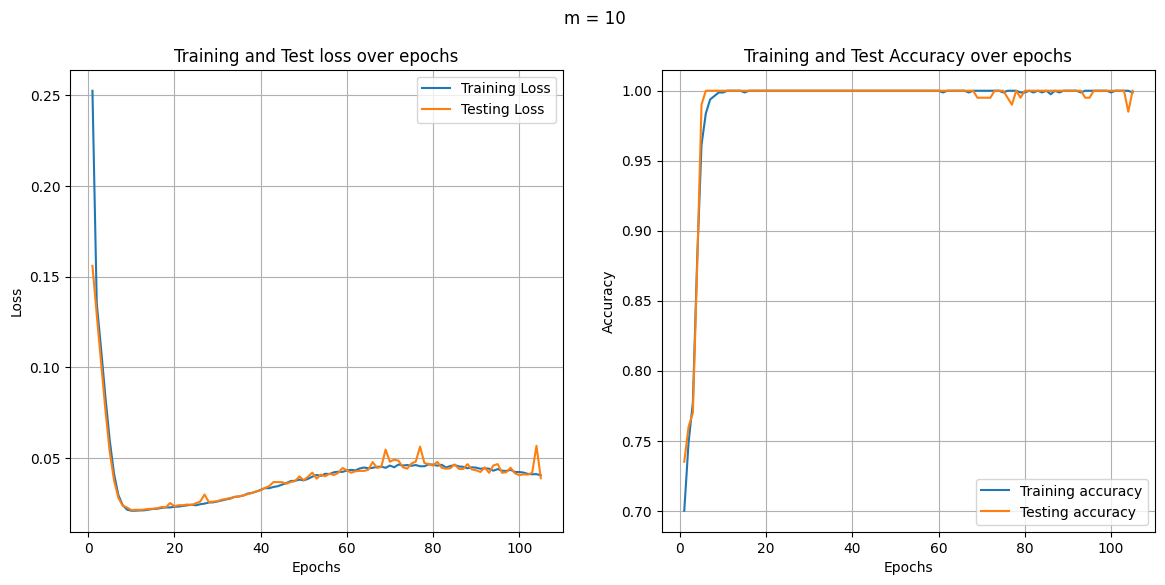

Results For m = 10:
Training Loss at the end of training:  0.03903691150592733
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.038822323084268785
Testing accuracy at the end of training:  1.0


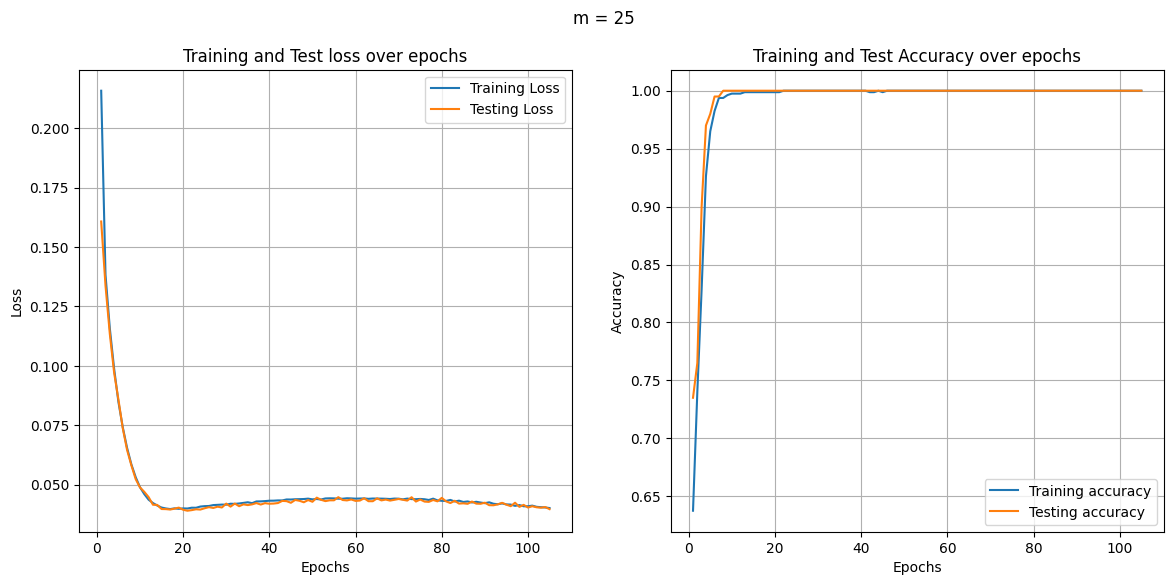

Results For m = 25:
Training Loss at the end of training:  0.03979897786037484
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.03963209166827994
Testing accuracy at the end of training:  1.0


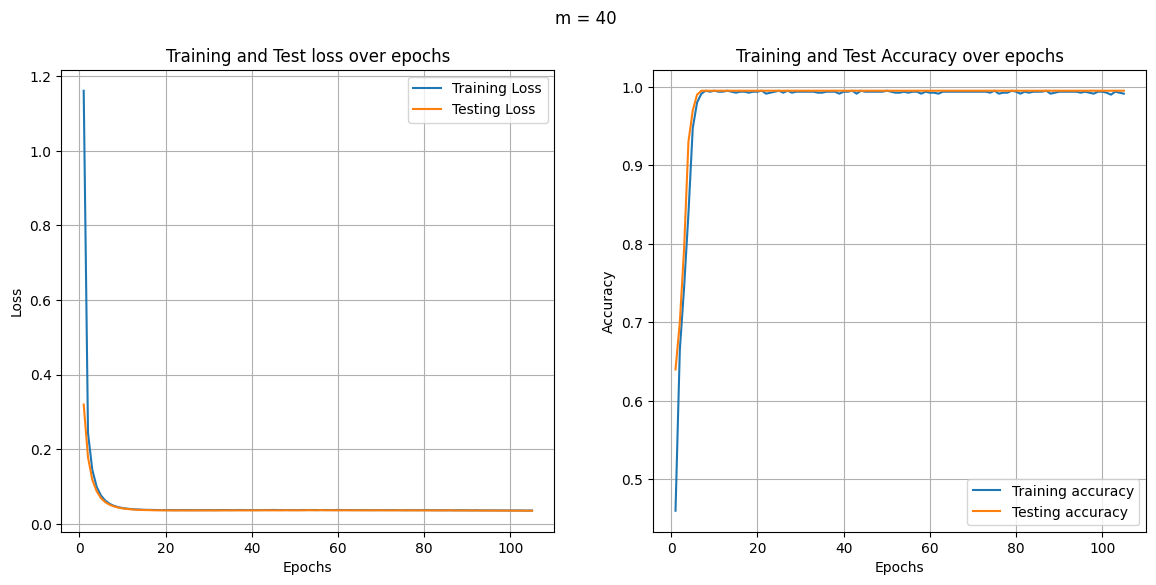

Results For m = 40:
Training Loss at the end of training:  0.035799526444193715
Training accuracy at the end of training:  0.99375
Testing Loss at the end of training:  0.0355026005784528
Testing accuracy at the end of training:  0.995


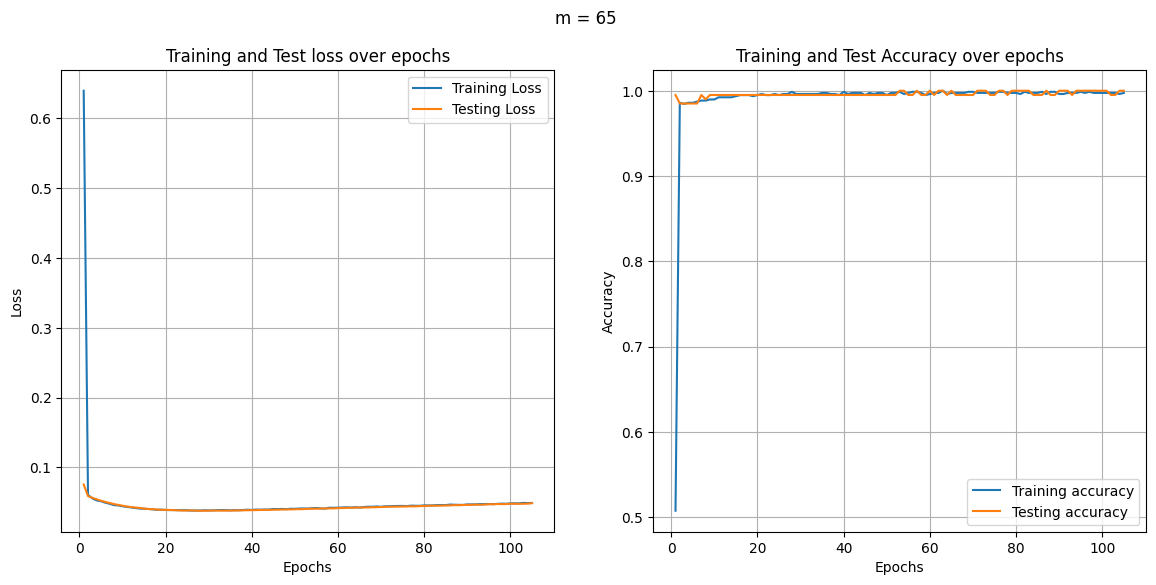

Results For m = 65:
Training Loss at the end of training:  0.04910154058124298
Training accuracy at the end of training:  0.9975
Testing Loss at the end of training:  0.04869300189796192
Testing accuracy at the end of training:  1.0


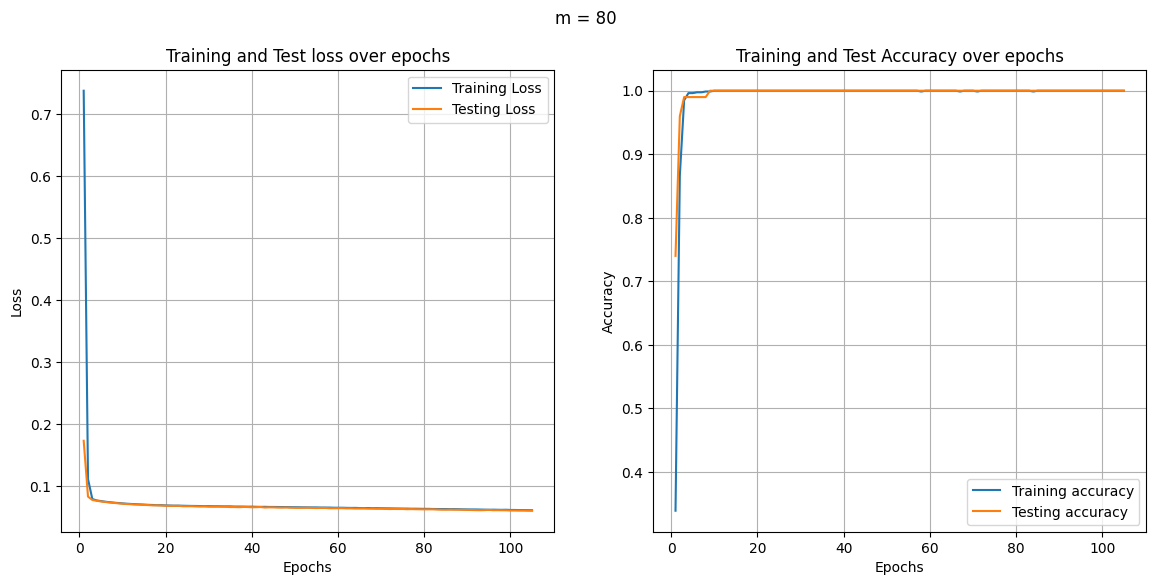

Results For m = 80:
Training Loss at the end of training:  0.06072024088864527
Training accuracy at the end of training:  1.0
Testing Loss at the end of training:  0.060094835735052504
Testing accuracy at the end of training:  1.0


In [ ]:
######################################################
## Learning OR with Stochastic gradient Descent ##
######################################################
N = 1000
np.random.seed(10)
X, Y = generate_data(N, 'OR')
X = np.concatenate((np.ones((N,1)), X), axis = 1)
permutation = np.random.permutation(len(X))
X = X[permutation]
Y = Y[permutation]

#train-test split
split = int(0.8*len(X))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

#hyperparameters
learning_rate = 0.1
epochs = 105
input_nodes = 3
hidden_nodes = 3
output_nodes = 1
epoch_vals = np.arange(1, epochs+1)
for m in [10,25,40,65,80]:
  #The batch size
  batch_size = m

  #training
  or_ANN = ArtificialNeuralNetwork(input_nodes, hidden_nodes, output_nodes, 'OR')
  loss_values_training, accuracy_values_training, loss_values_testing, accuracy_values_testing = or_ANN.train_network(X_train, X_test, Y_train, Y_test, epochs, batch_size, learning_rate, 'SGD')

  #Require Plots
  fig, ax = plt.subplots(1, 2, figsize = (14,6))
  fig.suptitle(f"m = {m}")
  ax[0].set_title("Training and Test loss over epochs")
  ax[0].plot(epoch_vals, loss_values_training, label = "Training Loss")
  ax[0].plot(epoch_vals, loss_values_testing, label = "Testing Loss")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Loss")
  ax[0].grid(True)

  ax[1].set_title("Training and Test Accuracy over epochs")
  ax[1].plot(epoch_vals, accuracy_values_training, label = "Training accuracy")
  ax[1].plot(epoch_vals, accuracy_values_testing, label = "Testing accuracy")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Accuracy")
  ax[1].grid(True)
  plt.show()

  y_pred_train = or_ANN.forwardpass(X_train)
  loss_tr = or_ANN.loss_mse(Y_train, y_pred_train)
  y_pred_test = or_ANN.forwardpass(X_test)
  # print(Y_test)
  # print(y_pred_test)
  loss_te = or_ANN.loss_mse(Y_test, y_pred_test)
  print(f"Results For m = {m}:")
  print("Training Loss at the end of training: ", loss_tr)
  print("Training accuracy at the end of training: ", or_ANN.accuracy(Y_train, y_pred_train))
  print("Testing Loss at the end of training: ", loss_te)
  print("Testing accuracy at the end of training: ", or_ANN.accuracy(Y_test, y_pred_test))